# Ford GoBike Data Exploration
## by Victoria Bloomingdale

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It includes all the rides recorded for the month of February, 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data
df = pd.read_csv(r'C:\Users\vkin1\OneDrive\Desktop\201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Quality  Issues
- Erroneous datatypes (start_time, end_time, start_station_id, end_station_id, bike_id, user_type, member_birth_year, member_gender,  bike_share_for_all_trip)

In [4]:
# create copy for cleaning and exploration
df2 = df.copy()

In [5]:
# change time columns to datetime datatype
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

# change columns with id's to object type
df2['start_station_id'] = df2['start_station_id'].astype(object)
df2['end_station_id'] = df2['end_station_id'].astype(object)
df2['bike_id'] = df2['bike_id'].astype(object)

# to category type
df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

# to integer type
df2['member_birth_year'] = df2['member_birth_year'].fillna(0).astype(int)

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The original dataset had 183412 entries and 16 columns. Most of the columns were either numeric or strings. After cleaning, 'start_time' and 'end_time' were converted to datetime type, columns with id's converted to strings, 'user_type' and 'member_gender' to categories, and 'member_birth_year' to int. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in looking at whether there are specific groups or variables that show a higher usage and/or longer trips for the bike program than others.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will look at user type, gender, and age to determine whether they are good indicators of higher usage and/or longer trips. 

## Univariate Exploration

I will look at the types of users to see whether any particular group shows a higher usage.

### Which user type has a higher number?

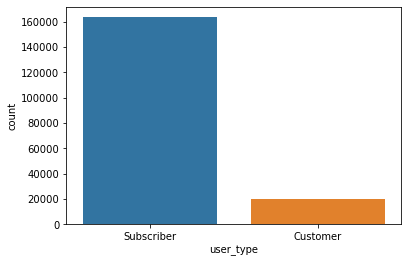

In [6]:
count = df2.user_type.value_counts()
user_order = count.index
sb.countplot(data = df2, x = 'user_type', order = user_order);

Looks like the majority of users are subscribers to the program. 

### Is there a difference in usage among gender types?

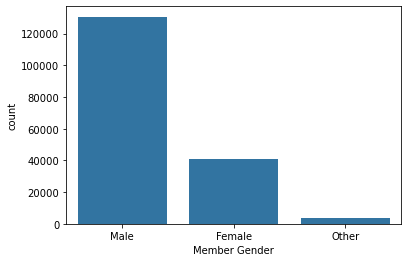

In [7]:
counts = df2.member_gender.value_counts()
gender_order = counts.index
base_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'member_gender', color = base_color, order = gender_order)
plt.xlabel('Member Gender');

There are roughly three times as many male users as female users. 

### What does the age distribution look like?

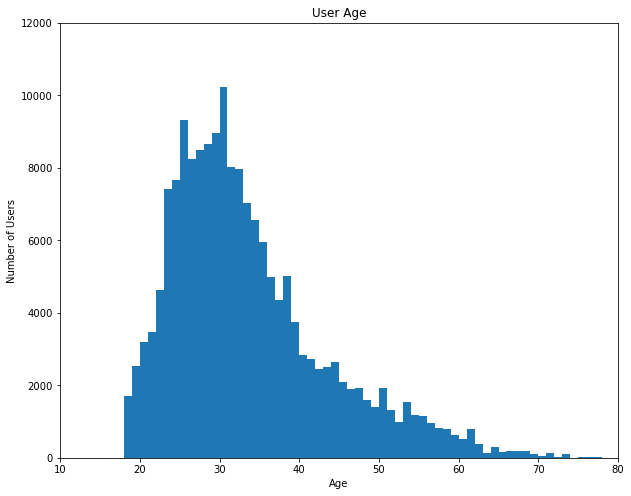

In [8]:
df2 = df2.loc[df2.member_birth_year >= 1940]

plt.figure(figsize = [10, 8])
bins = np.arange(1939, df2['member_birth_year'].max()+1, 1)
plt.hist(data = df2, x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], 
           [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

It seems the majority of the users are between 24 to 38 years old. I peaks at the age of 31.

### What are the peak hours for bike use?

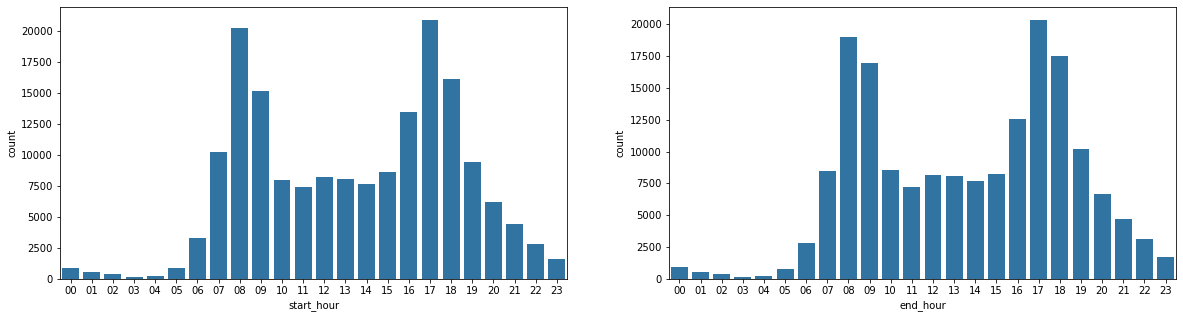

In [9]:
df2['start_hour'] = df2.start_time.dt.strftime('%H')
df2['end_hour'] = df2.end_time.dt.strftime('%H')

plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.countplot(data = df2, x = 'start_hour', color = base_color, 
             order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.subplot(1,2,2)
sb.countplot(data = df2, x = 'end_hour', color = base_color, 
             order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']);

Peak hours for both start and end time center around 7:00am to 9:00am and 4:00pm to 7:00pm. I suspect the bikes are used primarily for work commute. I will look at the days of the week to see if the bikes are used more frequently during the week than on the weekends. 

### Which days of the week are the bikes used more often?

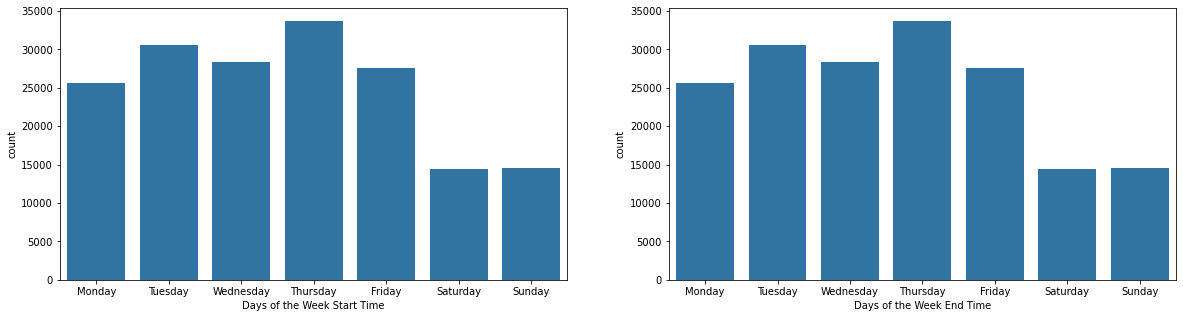

In [10]:
df2['start_week'] = df2.start_time.dt.strftime('%A')
df2['end_week'] = df2.end_time.dt.strftime('%A')
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.countplot(data = df2, x = 'start_week', color = base_color, 
             order = day_order)
plt.xlabel('Days of the Week Start Time')
plt.subplot(1,2,2)
sb.countplot(data = df2, x = 'end_week', color = base_color, 
             order = day_order)
plt.xlabel('Days of the Week End Time');

As predicted, the bikes are used more frequently on the weekdays instead of weekends. I want to look at the duration of the bike use. One of the advantanges of using a bike for work commute is not having to be stuck in traffic. This will significantly cut the commute time. If the bikes are mostly used for work commute, then I imagine the bikes weren't checked out for too long.

### What is the duration of the trips?

In [11]:
# Change the duration unit from seconds to minutes
df2['duration_sec'] = df2['duration_sec'].astype(float)
df2['duration_min'] = df2['duration_sec']//60

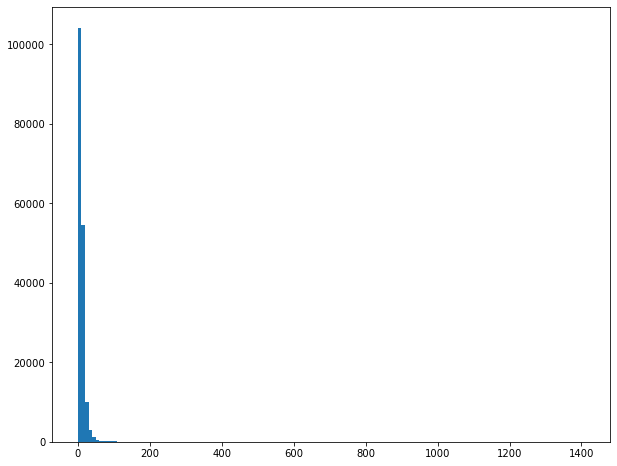

In [12]:
plt.figure(figsize = [10, 8])
bins = np.arange(0, df2['duration_min'].max()+10, 10)
plt.hist(data = df2, x = 'duration_min', bins = bins);

The histogram shows a wide spread, which warrants a closer look. I will use log transformation.

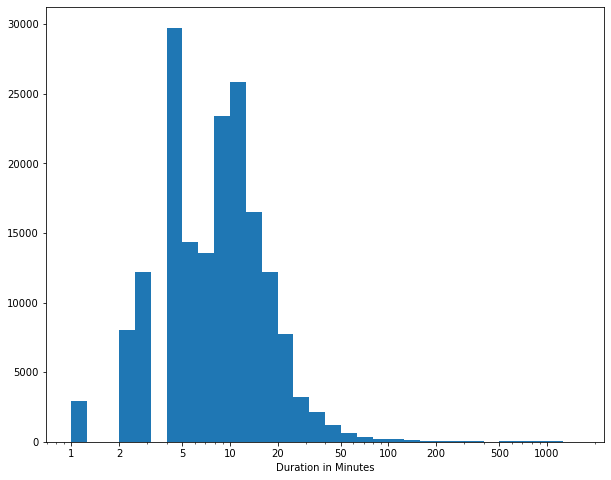

In [13]:
binsize = 0.1
bins = 10**np.arange(0.0, np.log10(df2['duration_min'].max())+binsize, binsize)

plt.figure(figsize = [10, 8])
plt.hist(data = df2, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 2e0, 5e0, 1e1, 2e1, 5e1, 1e2, 2e2, 5e2, 1e3], [1, 2, 5, 10, 20,  50,  100, 200, 500, 1000])
plt.xlabel('Duration in Minutes')
plt.show()

After plotting on a log-scale, the duration distribution looks to be bimodal, with the higher peak at around 4 minutes and the other peak around 13 minutes. Most trips range from 3 to 18 minutes. This seems to further indicate that the bikes are primarily used for work commute. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of bike use had a longer range of values, so I did a log tranformation to take a closer look. The duration distribution looked to be bimodal after the transformation, with one peak around 4 minutes, and the other at around 13 minutes. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was not any unusual distribution found. The only variable that warranted further investigation was the duration. 

## Bivariate Exploration

After looking at the variables individually, I will pair them up to see if there are any significant patterns. 

### Which age groups show a higher trip duration?

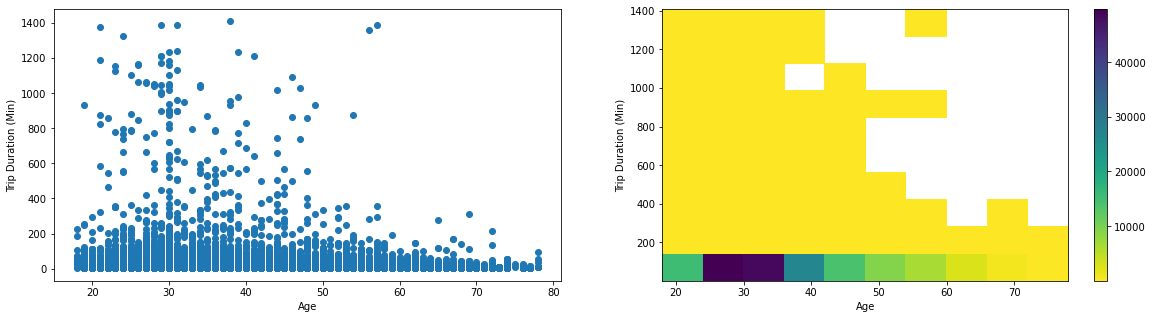

In [14]:
df2['age'] = 2019-df2['member_birth_year']

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.scatter(data = df2, x = 'age', y = 'duration_min')
plt.xlabel('Age')
plt.ylabel('Trip Duration (Min)')

plt.subplot(1, 2, 2)
plt.hist2d(data = df2, x = 'age', y = 'duration_min', cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Trip Duration (Min)');

Both plots show that those in the 20 to 45 age range take longer trips than others.

### How does trip duration vary among gender types?

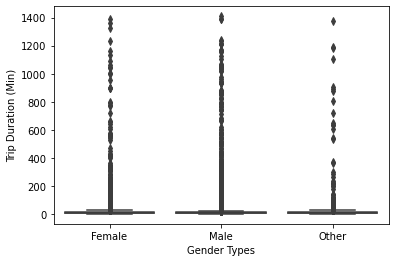

In [15]:
sb.boxplot(data = df2, x = 'member_gender', y = 'duration_min')
plt.xlabel('Gender Types')
plt.ylabel('Trip Duration (Min)');

It is hard to descern the details, so I will zoom in to have a closer look.

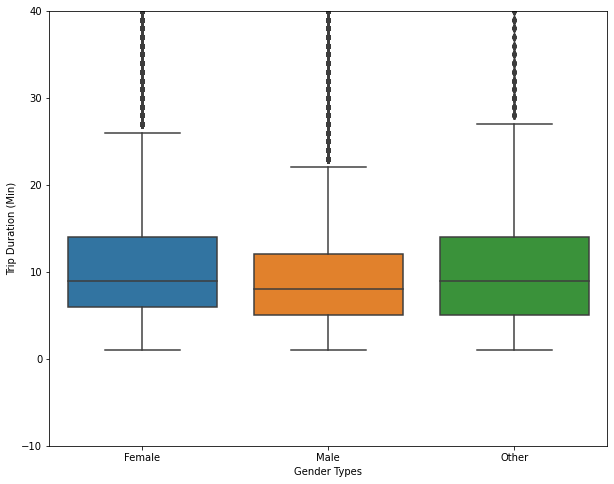

In [16]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df2, x = 'member_gender', y = 'duration_min')
plt.ylim([-10, 40])
plt.xlabel('Gender Types')
plt.ylabel('Trip Duration (Min)');

Both female and other gender uesers take longer trips than male users. 

### How does trip duration vary among user types?

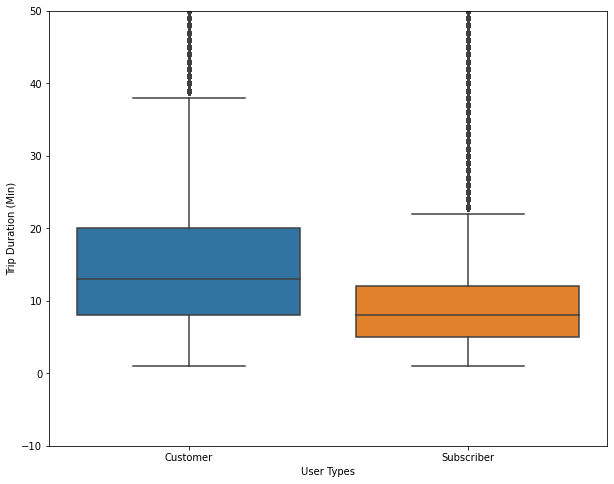

In [17]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df2, x = 'user_type', y = 'duration_min')
plt.ylim([-10, 50])
plt.xlabel('User Types')
plt.ylabel('Trip Duration (Min)');

The casual users, on average, tend to take longer trips than subscribers.

### Which day of the week are the bikes used more often among the user types?
As observed in the unvariate section, the bikes were mostly used for work commute during the week. The last visual shows subscribers tend to have shorter trips than customers. I want to see if there's a difference in pattern between the two user types throughout the week. Since the trips are completed within a day, I will look only at the start times by days of week. 

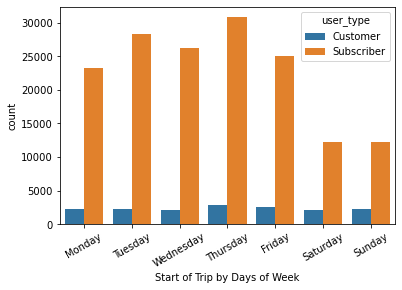

In [18]:
sb.countplot(data = df2, x = 'start_week', hue = 'user_type', order = day_order)
plt.xlabel('Start of Trip by Days of Week')
plt.xticks(rotation = 30)
plt.show();

Although subscribers by far use the bikes more than non-subscribers, there is a marked drop in usage on the weekends. The number  of casual users, on the other hand, remains roughly the same throughout the week. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Age and trip duration presented a negative correlation: the older the age, the shorter the duration of the trips. When looking at the duration among gender and user types, both males and subscribers tended to take shorter trips on average. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to see that although the number of customers was far smaller than the number of subscribers, the number of trips taken and the duration for customers tended to be more consistent and longer. It was also surprising to see that although  the number of male users was greater than female and other combined, male users had a shorter trip duration on average. 

## Multivariate Exploration

I want to explore further the relationship between user types, gender, age, and trip duration. 

### Is there a difference in trip duration among age groups when separated by gender types?

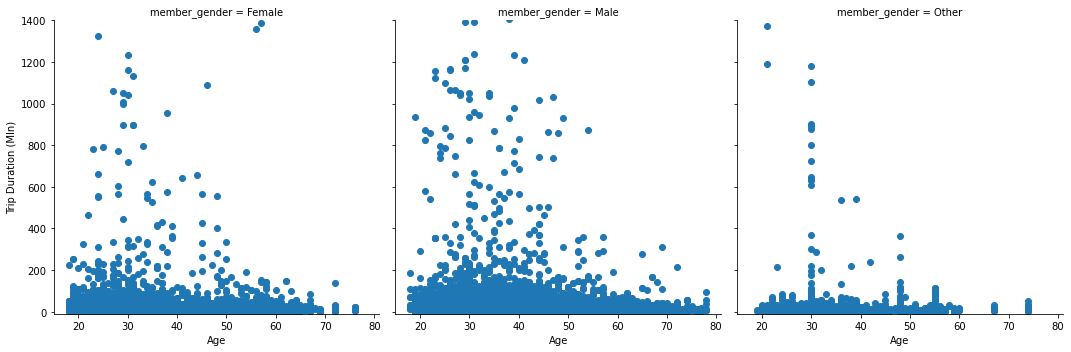

In [19]:
g = sb.FacetGrid(data = df2, col = 'member_gender', col_wrap = 3, height = 5, ylim = [-10, 1400])
g.map(plt.scatter, 'age', 'duration_min')
g.set_axis_labels('Age', 'Trip Duration (MIn)')
plt.show()

Most trips were taken by 20-45 year olds regardless of gender. 

### Which day of the week are the bikes used longer among gender types and user types?

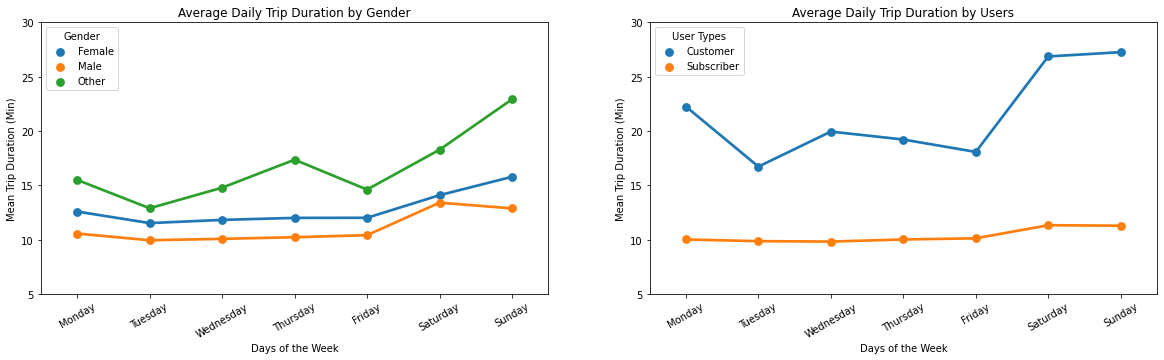

In [21]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.pointplot(data = df2, x = 'start_week', y = 'duration_min', hue = 'member_gender', ci=None, order = day_order)
plt.title('Average Daily Trip Duration by Gender')
plt.xlabel('Days of the Week')
plt.ylabel('Mean Trip Duration (Min)')
plt.ylim(5, 30)
plt.xticks(rotation = 30)
plt.legend(title = 'Gender', loc='upper left')

plt.subplot(1,2,2)
sb.pointplot(data = df2, x = 'start_week', y = 'duration_min', hue = 'user_type', ci=None, order = day_order)
plt.title('Average Daily Trip Duration by Users')
plt.xlabel('Days of the Week')
plt.ylabel('Mean Trip Duration (Min)')
plt.ylim(5, 30)
plt.xticks(rotation = 30)
plt.legend(title = 'User Types')
plt.show()

All three gender groups show the bikes were used longer on average during the weekend than the weekdays. Same conclusion can be drawn when looking at user types. However, the change is not as discernable in subscribers than customers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As mentioned previously during the bivariate exploration, the more frequent users with longer trip duration were between 20 to 45 years of age. The pattern remained the same when diving deeper by looking at gender types. It is also notable to see that the trip duration was longer on the weekends for all gender and user types.

### Were there any interesting or surprising interactions between features?

> It was interesting to see that although subscribers far outnumber customers, subscribers on average have make much shorter trips than a customer even on the weekends. We see a similar pattern when looking at gender. Even though male users are higher in number, females and other gender types tend to take longer trips.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!